In [1]:
!nvidia-smi

Mon Apr 19 19:12:58 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.89       Driver Version: 460.89       CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 166... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   39C    P8    11W /  N/A |    153MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import timm
import torch

from deepdreamer import DeepDreamer
from utils import open_image

In [3]:
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cuda', index=0)

In [4]:
dream = DeepDreamer(model_name="inception_v3", layers_names=[], device)

In [5]:
for name, _ in dream.model.named_children():
    print(name)

Conv2d_1a_3x3
Conv2d_2a_3x3
Conv2d_2b_3x3
Pool1
Conv2d_3b_1x1
Conv2d_4a_3x3
Pool2
Mixed_5b
Mixed_5c
Mixed_5d
Mixed_6a
Mixed_6b
Mixed_6c
Mixed_6d
Mixed_6e
Mixed_7a
Mixed_7b
Mixed_7c
global_pool
fc


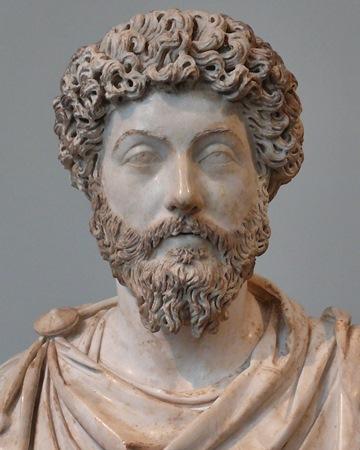

In [6]:
img = open_image("example_img.jpg")
img

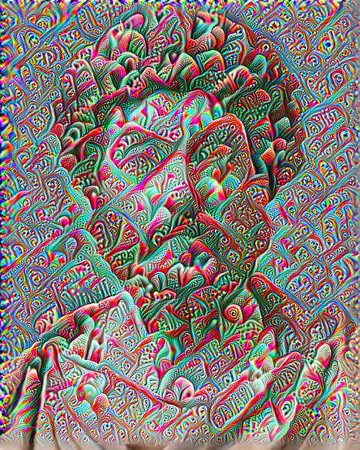

In [7]:
dream.set_layers(["Mixed_5b"])
dream.run_deep_dream_with_octaves(img)

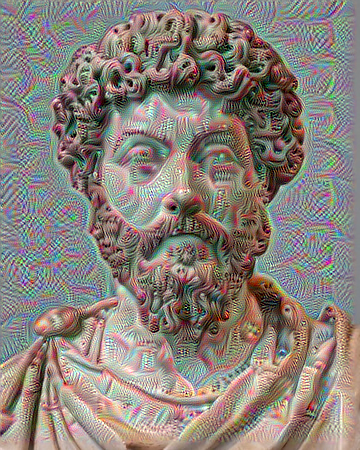

In [8]:
dream.set_layers(["Mixed_5c"])
dream.run_deep_dream_simple(img)